Частина 1 - Обов'язкова

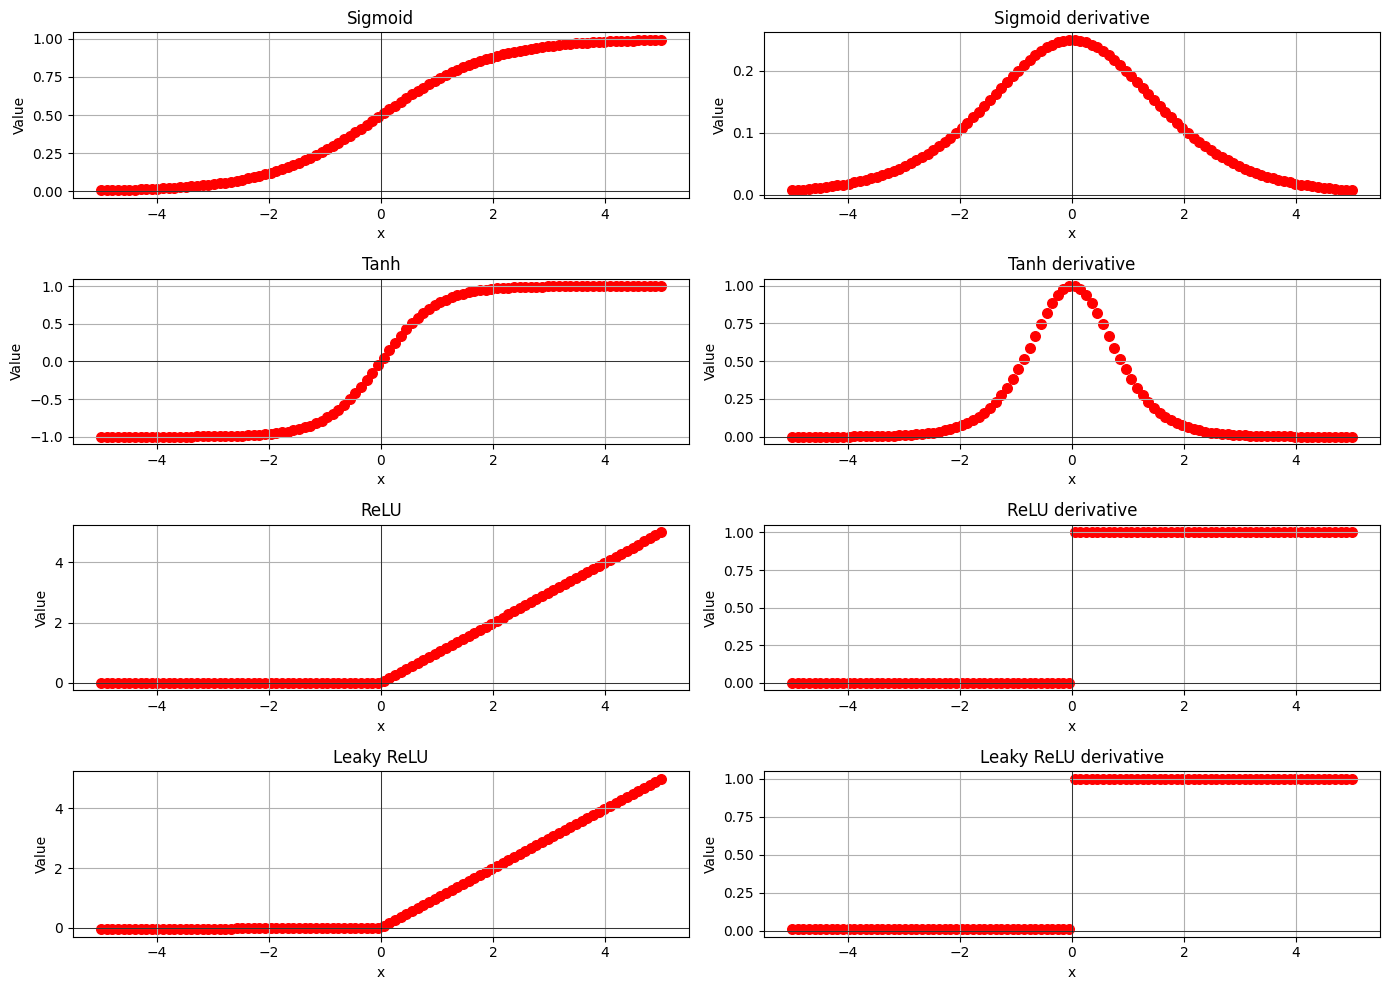

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch


def implement_activations(x):
    """
    Реалізуйте наступні функції активації:
    1. Sigmoid та її похідну
    2. Tanh та її похідну
    3. ReLU та її похідну
    4. Leaky ReLU (alpha=0.01) та її похідну

    Input: x - numpy array
    Output: словник з результатами всіх функцій
    """
    results = {}

    # Sigmoid
    sigmoid = 1 / (1 + np.exp(-x)) 
    sigmoid_derivative = sigmoid * (1 - sigmoid)
    results['sigmoid'] = sigmoid
    results['sigmoid_derivative'] = sigmoid_derivative

    # Tanh
    tanh = np.tanh(x)
    tanh_derivative = 1 - tanh**2
    results['tanh'] = tanh
    results['tanh_derivative'] = tanh_derivative

    # ReLU          
    ReLU = np.maximum(0, x)              
    ReLU_derivative = np.where(x > 0, 1, 0)
    results['ReLU'] = ReLU
    results['ReLU_derivative'] = ReLU_derivative

    # Leaky ReLU
    alpha = 0.01
    leaky_ReLU = np.where(x > 0, x, alpha * x)
    leaky_ReLU_derivative = np.where(x > 0, 1, alpha)
    results['leaky_ReLU'] = leaky_ReLU
    results['leaky_ReLU_derivative'] = leaky_ReLU_derivative

    return results


x = np.linspace(-5, 5, 100) # linspace(start, stop, num)
activations = implement_activations(x)

to_plt = [
    ('sigmoid', 'Sigmoid'),
    ('sigmoid_derivative', "Sigmoid derivative"),
    ('tanh', 'Tanh'),
    ('tanh_derivative', "Tanh derivative"),
    ('ReLU', 'ReLU'),
    ('ReLU_derivative', "ReLU derivative"),
    ('leaky_ReLU', 'Leaky ReLU'),
    ('leaky_ReLU_derivative', "Leaky ReLU derivative")
]

plt.figure(figsize=(14, 10)) # figure creat size 

for i, (key, title) in enumerate(to_plt):
    plt.subplot(4, 2, i + 1)      
    plt.scatter(x, activations[key], s=48, color='red')  
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
import numpy as np

class SimplePerceptron:
    """
    Реалізація персептрона для функції AND
    """

    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0.0

    def predict(self, X):
        # Обчислення: сума ваг * вхід + зсув
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def train_step(self, X, y, learning_rate=0.1):
        total_error = 0
        for xi, yi in zip(X, y):
            y_pred = self.predict(xi)
            error = yi - y_pred
            self.weights += learning_rate * error * xi
            self.bias += learning_rate * error
            total_error += abs(error)
        return total_error

    def fit(self, X, y, epochs=100, learning_rate=0.1):
        for epoch in range(epochs):
            total_error = self.train_step(X, y, learning_rate)
            print(f"Epoch {epoch + 1}: Total error = {total_error}")
            if total_error == 0:
                print("Training complete")
                break

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

perceptron = SimplePerceptron(2)
perceptron.fit(X=X_and, y=y_and)

print("\nResult:")
for x in X_and:     
    print(f"{x} -> {perceptron.predict(x)}")
 

print(f"\nFinal weight: {perceptron.weights}, bias: {perceptron.bias}")


Epoch 1: Total error = 2
Epoch 2: Total error = 3
Epoch 3: Total error = 3
Epoch 4: Total error = 0
Training complete

Result:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1

Final weight: [0.2 0.1], bias: -0.20000000000000004


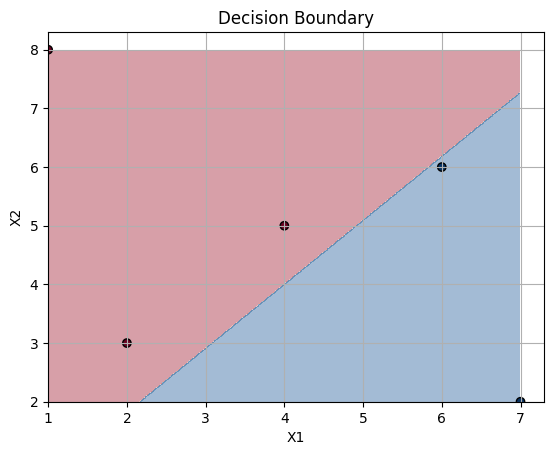

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

def plot_decision_boundary(model, X, y):
    """
    Візуалізуйте decision boundary для 2D даних

    1. Створіть сітку точок
    2. Передбачте клас для кожної точки
    3. Намалюйте contour plot
    4. Додайте тренувальні точки
    """

    x_min = X[:, 0].min() 
    x_max = X[:, 0].max() 
    y_min = X[:, 1].min() 
    y_max = X[:, 1].max() 

    h = 0.01   

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Передбачаємо клас для кожної точки сітки
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # contour plot - межа прийняття рішення
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.grid(True)
    plt.show()

# Використайте для візуалізації вашого персептрона
# Приклад даних (2D)
X = np.array([
    [2, 3], # 0
    [4, 5], # 0
    [1, 8], # 0
    [7, 2], # 1
    [6, 6]  # 1
])

y = np.array([0, 0, 0, 1, 1])

my_model = Perceptron()
my_model.fit(X, y)

# Візуалізуємо decision boundary
plot_decision_boundary(my_model, X, y)


In [ ]:
import numpy as np

def relu(X):
    return np.maximum(0, X)

def mlp_forward_pass(X, weights, biases, activation='relu'):
    """
    Реалізуйте forward pass для MLP

    X: вхідні дані [batch_size, input_size]
    weights: список матриць ваг для кожного шару
    biases: список векторів зміщень

    Поверніть:
    - фінальний вихід
    - список активацій всіх шарів (для візуалізації)
    """

    activations = [X]
    A = X

    if activation == 'relu':
        act_fn = relu


    for i, (W, b) in enumerate(zip(weights, biases)):
        Z = A @ W + b  
  
        if i == len(weights) - 1:
            A = Z
        else:
            A = act_fn(Z) 
            
        activations.append(A)


    output = A
    return output, activations

# Тест
#X = randn(5, 3)  # 5 прикладів, 3 features
#weights = [random.randn(3, 4), randn(4, 2)]  # 3->4->2
#biases = [zeros(4), zeros(2)]

np.random.seed(42)
X = np.random.randn(5, 3)               # 5 прикладів, 3 входи
weights = [np.random.randn(3, 4),       # шар 3->4 нейрони
           np.random.randn(4, 2)]       # шар 4->2 нейрони
biases = [np.zeros(4),
          np.zeros(2)]

output, acts = mlp_forward_pass(X, weights, biases)
print("Форми активацій:", [a.shape for a in acts])

Форми активацій: [(5, 3), (5, 4), (5, 2)]


Частина 2

In [ ]:
class XORNetwork:
    """
    Створіть 2-шарову мережу для вирішення XOR
    Архітектура: 2 -> 3 -> 1
    """

    def __init__(self):
        # Ініціалізація ваг
        # Використайте Xavier initialization: np.random.randn() * sqrt(2/n_in)
        pass

    def forward(self, X):
        # Forward pass з ReLU для прихованого шару
        # та sigmoid для виходу
        pass

    def compute_loss(self, y_pred, y_true):
        # Binary cross-entropy loss
        pass

    def backward(self, X, y_true):
        # Обчисліть градієнти (можна спрощено)
        pass

    def train(self, X, y, epochs=1000, lr=0.1):
        # Навчання з градієнтним спуском
        pass

# Навчіть на XOR
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])

model = XORNetwork()
model.train(X_xor, y_xor)

# Візуалізуйте decision boundary

In [ ]:
def compare_initializations(X, y):
    """
    Порівняйте різні методи ініціалізації:
    1. Нулі (покажіть, чому це погано)
    2. Випадкові малі числа (randn * 0.01)
    3. Xavier/Glorot (randn * sqrt(2/n_in))
    4. He initialization (randn * sqrt(2/n_in))

    Для кожного методу:
    - Навчіть однакову архітектуру
    - Збережіть криву втрат
    - Візуалізуйте результати
    """

    initializations = {
        'zeros': lambda n_in, n_out: np.zeros((n_in, n_out)),
        'small_random': lambda n_in, n_out: np.random.randn(n_in, n_out) * 0.01,
        'xavier': lambda n_in, n_out: np.random.randn(n_in, n_out) * np.sqrt(2/(n_in + n_out)),
        'he': lambda n_in, n_out: np.random.randn(n_in, n_out) * np.sqrt(2/n_in)
    }

    results = {}
    # Ваш код тут

    return results

# Візуалізуйте криві навчання для різних ініціалізацій

In [ ]:
def train_with_minibatch(model, X, y, batch_size=32, epochs=100):
    """
    Реалізуйте mini-batch gradient descent:
    1. Розділіть дані на батчі
    2. Перемішайте дані кожну епоху
    3. Оновлюйте ваги після кожного батча

    Порівняйте з:
    - Batch GD (весь датасет)
    - SGD (batch_size=1)

    Виведіть графік швидкості збіжності
    """

    n_samples = len(X)
    losses = []

    for epoch in range(epochs):
        # Shuffle
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        epoch_loss = 0
        # Ваш код для обробки батчів

        losses.append(epoch_loss)

    return losses

# Порівняйте різні розміри батчів: 1, 16, 32, 64, весь датасет

In [ ]:
class SGDWithMomentum:
    """
    Реалізуйте SGD з momentum
    v = beta * v - lr * gradient
    w = w + v
    """

    def __init__(self, params, lr=0.01, momentum=0.9):
        self.params = params
        self.lr = lr
        self.momentum = momentum
        self.velocity = [np.zeros_like(p) for p in params]

    def step(self, gradients):
        """Один крок оновлення"""
        # Ваш код тут
        pass

# Порівняйте звичайний SGD та SGD з momentum на складній функції втрат

Частина 3

In [ ]:
def animate_training(X, y, model, epochs=100):
    """
    Створіть анімацію, яка показує:
    1. Як змінюється decision boundary під час навчання
    2. Криву втрат
    3. Точність на кожній епосі

    Використайте matplotlib.animation
    """

    from matplotlib.animation import FuncAnimation

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    def update(epoch):
        # Один крок навчання
        # Оновити decision boundary
        # Оновити графік втрат
        pass

    anim = FuncAnimation(fig, update, frames=epochs, interval=50)
    return anim

# Збережіть як GIF або покажіть в notebook

In [ ]:
class MNISTFromScratch:
    """
    Реалізуйте повний pipeline для MNIST:
    1. Завантаження даних (можна використати torchvision)
    2. MLP архітектура (784 -> 128 -> 64 -> 10)
    3. Softmax + Cross-entropy loss
    4. Backpropagation через всі шари
    5. Досягніть >95% точності
    """

    def __init__(self):
        # Ваша архітектура
        pass

    def softmax(self, x):
        # Stable softmax
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_pred, y_true):
        # CE loss для multiclass
        pass

    def train(self, X_train, y_train, X_test, y_test):
        # Повний цикл навчання
        pass

# Навчіть та оцініть модель

In [ ]:
def create_adversarial_example(model, x, y_true, epsilon=0.1):
    """
    Створіть adversarial приклад використовуючи FGSM
    (Fast Gradient Sign Method)

    1. Обчисліть градієнт втрат по входу
    2. Створіть perturbation: epsilon * sign(gradient)
    3. Додайте до оригінального зображення
    4. Покажіть, що модель помиляється
    """

    # Ваш код тут
    # x_adv = x + epsilon * sign(grad_x)

    return x_adversarial

# Створіть adversarial приклади для MNIST
# Візуалізуйте оригінал vs adversarial